# Hierarchical Clustering, PCA and t-SNE Embedding by Qiaoying Zhang

### About Hierarchical Clustering
Hierarchical clustering aims to group similar data points into clusters or hierarchies based on their similarity or dissimilarity. Unlike other clustering techniques, hierarchical clustering creates a tree-like structure of clusters, also known as a dendrogram, which provides a visual representation of the data's organization at different levels of granularity.

### About Dataset
The dataset is retrieved from the website: [animals with attributes dataset](http://attributes.kyb.tuebingen.mpg.de). 
This dataset serves as a valuable platform for assessing transfer-learning algorithms, with a specific focus on attribute-based classification. It encompasses a collection of 30,475 images belonging to 50 distinct animal classes, and for each image, six pre-extracted feature representations are available. What sets this dataset apart is its alignment with Osherson's well-established class/attribute matrix, which assigns 85 numeric attribute values to each class. This alignment enables the seamless transfer of information across different classes using the shared attributes, making it a versatile resource for exploring the potential of transfer learning.

### Purpose of Project
In the context of this project, my objective is to explore the hierarchical relationships among animals. I aim to delve into the mechanisms of dimensionality reduction techniques like PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding), understanding how they operate and, more importantly, how they compare in revealing complex hierarchical patterns within the data. Furthermore, I am keen to investigate the influence of perplexity on the performance of the t-SNE model, scrutinizing how this parameter impacts the accuracy and interpretability of the resulting embeddings. This exploration not only enhances my understanding of these fundamental data analysis techniques but also offers insights into the intricate connections that exist within the animal kingdom.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams

## Online computation

In [2]:
data = np.loadtxt('./predicate-matrix-continuous.txt') # feature matrix 
name = np.loadtxt('./classes.txt', dtype=str, delimiter='\t')[:,1] # animal names

data.shape, name.shape

((50, 85), (50,))

## Visualize hierarchical cluster tree

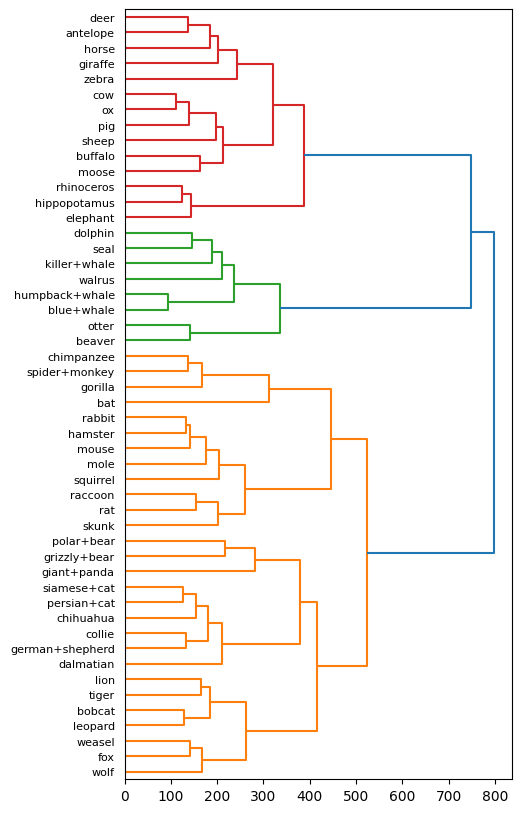

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

rcParams['figure.figsize'] = 5, 10

Z = linkage(data, 'ward') # Ward variance minimization algorithm
dn = dendrogram(Z, orientation='right', labels=name)

## Flat clustering

In [4]:
k = 10 # k-mean cluster
clusters = fcluster(Z, t=k, criterion='maxclust')

clusters

array([10,  3,  7,  6,  2,  2, 10,  2,  7,  2,  4,  4,  1,  8,  1,  9,  5,
        7,  8,  5,  9,  1,  9,  7,  5,  4,  4,  8,  4,  5, 10,  1,  2,  4,
        1,  6,  9, 10,  3, 10,  1,  9,  1,  4,  3,  2,  7,  4,  9,  7],
      dtype=int32)

## Compute k-means cost function

In [5]:
cost = 0

# get cost of clusters
for i in range(k):
    cluster = np.where(clusters==i+1)[0]
    cluster_sum = np.zeros(data.shape[1])
    
    # get sum of feature vectors in a cluster
    for j in cluster:
        cluster_sum += data[j]
    # get center of vectors in a cluster
    center = cluster_sum/len(cluster)

    # get minimized length of points to cluster center
    for k in cluster:
        # squared euclidean distance
        cost += np.sum(np.square(data[k]-center))
    
print('The k-means cost is: ' + str(cost))

The k-means cost is: 679136.2672672619


## Run k-means 10 times; display best(lowest cost) solution

In [6]:
from sklearn.cluster import KMeans

center_lst = []
cluster_lst = []
cost_lst = []

for i in range(10):
    kmeans = KMeans(n_clusters=10, init='random', n_init=10).fit(data)
    center_lst.append(kmeans.cluster_centers_)
    cluster_lst.append(kmeans.labels_)
    cost_lst.append(kmeans.inertia_)
    
min_idx = np.argmin(cost_lst)
print('The lowest cost of running k-means 10 times is {}, \nits cluster distribution includes: \n{}'
      .format(min(cost_lst), cluster_lst[min_idx]))
print()
print('The centers of the best solution is: \n' + str(center_lst[min_idx]))

The lowest cost of running k-means 10 times is 725088.6119621645, 
its cluster distribution includes: 
[6 2 4 8 5 5 3 5 4 5 8 8 1 7 1 3 0 4 7 0 3 1 6 4 0 8 8 7 8 8 6 1 5 8 8 4 6
 9 3 6 1 3 1 8 2 5 4 8 3 4]

The centers of the best solution is: 
[[ 4.89733333e+01  6.16333333e+00  2.38000000e+00  5.66066667e+01
   2.15133333e+01  5.20666667e+00  1.19000000e+00  8.33333333e-01
   2.06666667e-01  0.00000000e+00  1.04000000e+00  7.53733333e+01
   1.82000000e+00  1.89500000e+01  3.95900000e+01  2.86666667e+01
   1.27766667e+01  3.44533333e+01  1.77635684e-15  6.89700000e+01
   0.00000000e+00  1.21866667e+01  1.26866667e+01  5.15333333e+01
   2.08333333e+00  4.55066667e+01  3.87033333e+01  1.65333333e+01
   7.94000000e+00  1.04000000e+00  1.77635684e-15  6.33000000e+00
   0.00000000e+00  3.64700000e+01  4.44089210e-16  5.93666667e+00
   2.08333333e+00  0.00000000e+00  5.36666667e+01  5.07066667e+01
   1.43066667e+01  4.62600000e+01  1.22500000e+01  4.38933333e+01
   5.61433333e+01  3.80333333

In [7]:
cost_lst

[755358.1790977381,
 730987.7654416668,
 748768.9454309525,
 725625.0408944446,
 728668.3018601191,
 725088.6119621645,
 756905.8370375,
 729323.2869687662,
 736006.1757141666,
 738874.7677746032]

## PCA projection embedding (2-d)
PCA (Principal Component Analysis) embedding, also referred to as PCA projection or dimensionality reduction, is a technique used to transform high-dimensional data into a lower-dimensional space while preserving the most significant variance in the original data. PCA identifies the directions (principal components) along which the data varies the most. These principal components are orthogonal to each other, meaning they are uncorrelated. The first principal component captures the most variance, the second captures the second most, and so on.

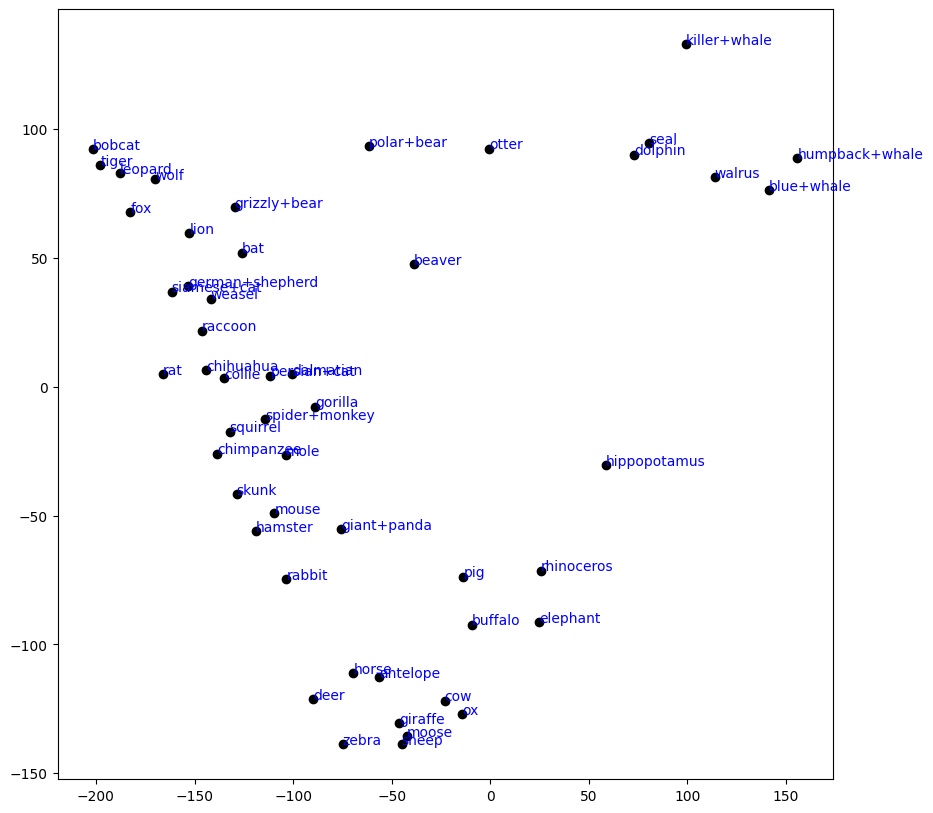

In [8]:
import warnings
warnings.filterwarnings('ignore')

# projection by eigenvectors
S = np.cov(data, rowvar=False)
vals, vecs = np.linalg.eig(S)
i = np.argsort(vals)[::-1]
vals = vals[i]
vecs = vecs[:, i]

# projection = x.u or u.x
proj = np.dot(vecs[:,:2].T, data.T)
# two eigenvectors associated with the top-2 eigenvalue
x1 = proj[0]
x2 = proj[1]

rcParams['figure.figsize'] = 10, 10
# plot embedding
plt.plot(x1, x2, 'ko')
# label embedding
for (i, j, label) in zip(x1, x2, name):
    plt.text(i, j, label, color='blue')
    
plt.show()

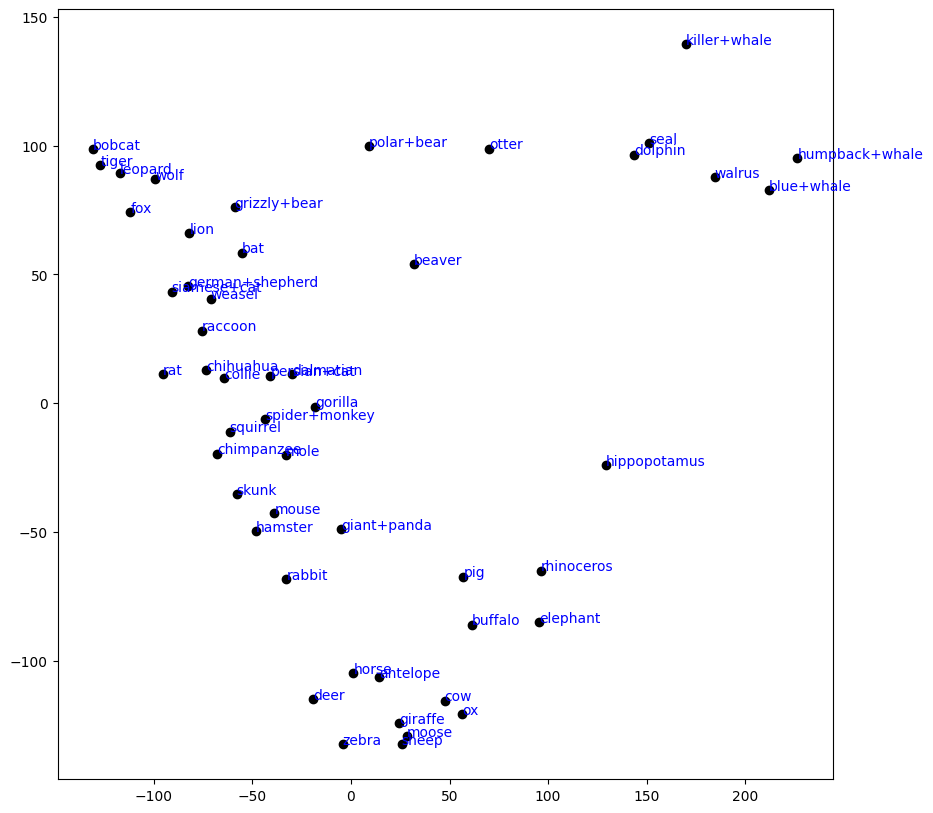

In [9]:
from sklearn.decomposition import PCA

# projection by PCA library
pca = PCA(n_components=2).fit_transform(data)
x1 = pca[:, 0]
x2 = pca[:, 1]

rcParams['figure.figsize'] = 10, 10
# plot embedding
plt.scatter(x1, x2, c='black')
# label embedding
for (i, j, label) in zip(x1, x2, name):
    plt.text(i, j, label, color='blue')
    
plt.show()

## TSNE projection embedding (2-d)
t-Distributed Stochastic Neighbor(t-SNE) Embedding is a dimensionality reduction technique that maps data points from a high-dimensional space to a lower-dimensional space (typically 2D or 3D) while preserving the pairwise similarities or distances between them as closely as possible. It accomplishes this by considering each data point as a probability distribution over its neighbors. The algorithm minimizes the divergence between two probability distributions: one that measures pairwise similarities in the high-dimensional space and another that measures pairwise similarities in the lower-dimensional space.

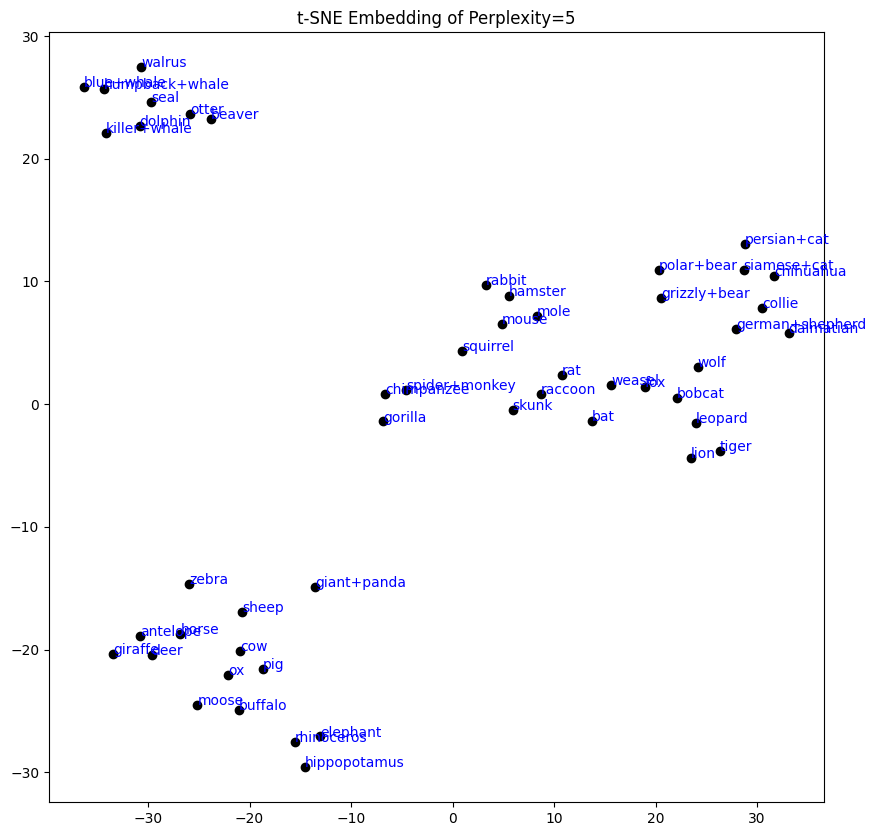

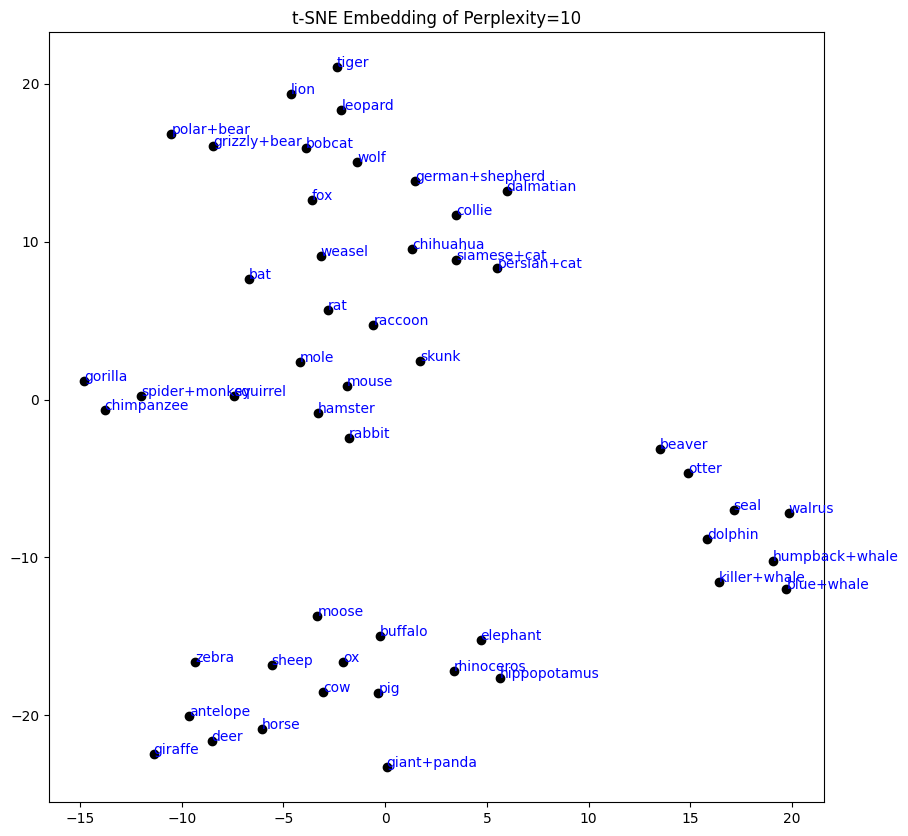

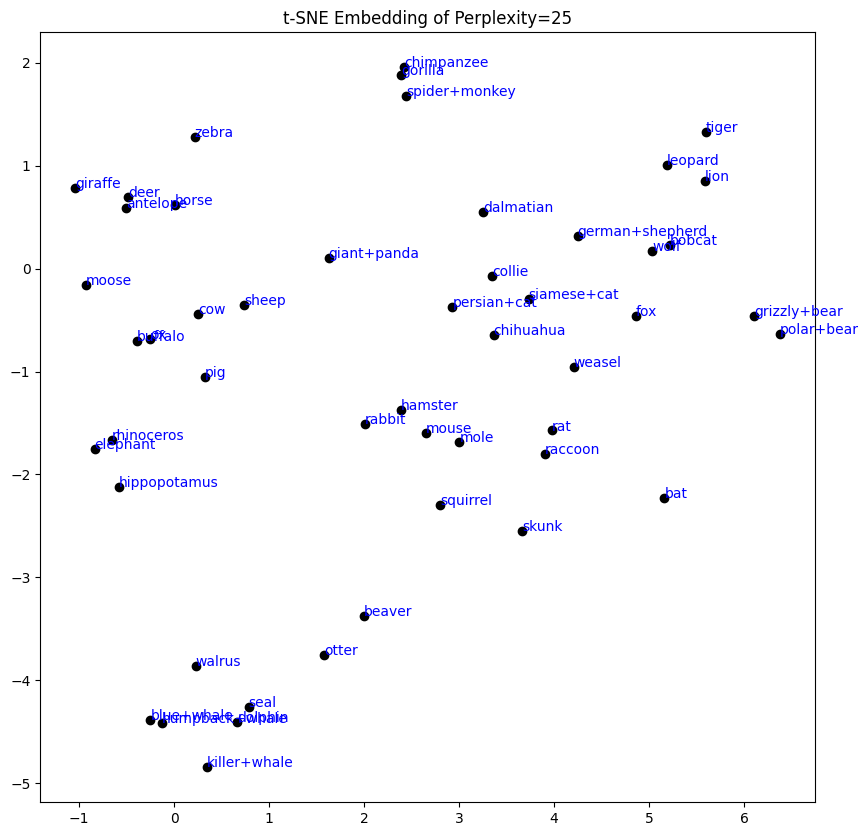

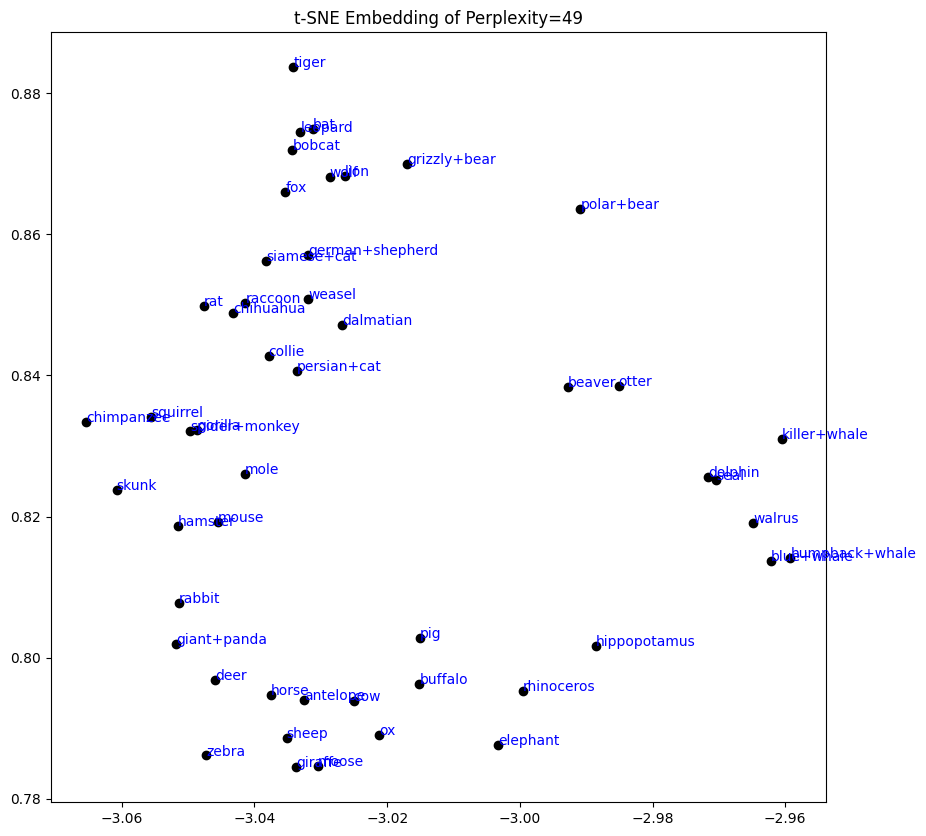

In [10]:
from sklearn.manifold import TSNE
# perplxity to obtain embedding by solving a non-convex optimization problem
perplexity = [5, 10, 25, 49]
Z_lst = []

for p in perplexity:
    Z = TSNE(n_components=2, perplexity=p).fit_transform(data)
    Z_lst.append(Z)
    x1 = Z[:, 0]
    x2 = Z[:, 1]
    
    rcParams['figure.figsize'] = 10, 10
    # plot embedding
    plt.scatter(x1, x2, c='black')
    # label embedding
    for (i, j, label) in zip(x1, x2, name):
        plt.text(i, j, label, color='blue')

    plt.title('t-SNE Embedding of Perplexity=' + str(p))
    plt.show()

In [11]:
def squared_dist(input, i, j):
    """
    Get squared euclidean distance of embedding.

    input = data or 2-d visualization embedding
    i = integer index
    j = second integer index
    """
    return np.sum(np.square(input[i]-input[j]))

n = data.shape[0]
D = 0
# sum of distance over all n^2 entries of the matrix
for i in range(n):
    for j in range(n):
        D += squared_dist(data, i, j)
# average distance
D_mean = D/n**2

def get_scaling(input):
    """
    Calculate scaling factor c, which is mean(D)/mean(Dh).
    D is the sum of all distance over all n^2 entries of the data matrix.
    Dh is the sum of all distance over all n^2 entries of the embedding matrix.

    input = 2-d visualization embedding
    """
    Dh = 0
    
    for i in range(n):
        for j in range(n):
            Dh += squared_dist(input, i, j)
    
    return D_mean/(Dh/n**2)

def average_distortion(input):
    """
    Get average distortion of embedding, which is the mean multiplicative factor
    by which the distance between xi and xj is distorted.
    Equation: distortion(i, j) = max(D[ij]/c*Dh[ij], c*Dh[ij]/D[ij])

    input = 2-d visualization embedding
    """
    c = get_scaling(input)
    dis = []
    
    for i in range(n):
        for j in range(n):
            D = squared_dist(data, i, j)
            Dt = squared_dist(input, i, j)
            # ensure there’s no division by 0 occurring in the future steps
            if (c == 0 or Dt == 0) and (D == 0): break
            if D == 0: dis.append(D/(c*Dt))
            elif c == 0 or Dt == 0: dis.append((c*Dt)/D)
            else: dis.append(max(D/(c*Dt), (c*Dt)/D))

    return np.sum(dis)/len(dis) # average distortion

print('Average distortion of pca: ' + str(average_distortion(pca)))
for i in range(len(perplexity)):
    print('Average distortion of t-SNE when perplexity={}: '.format(perplexity[i]) + str(average_distortion(Z_lst[i])))

Average distortion of pca: 7.170371149558344
Average distortion of t-SNE when perplexity=5: 6.60511417015875
Average distortion of t-SNE when perplexity=10: 3.714898243239689
Average distortion of t-SNE when perplexity=25: 4.441474439875873
Average distortion of t-SNE when perplexity=49: 7.015532766748004
